# IFT712 - Projet de session

* 6 méthodes de classification 
* Analyse des données
* Recherche d'hyperparamètres
* Visualisation des résultats

# Configuration

In [1]:
# Vérifier si les bibliothèques nécessaires sont déjà installées
try:
    import pandas as pd
    import numpy as np
    import sklearn
    import matplotlib
    import seaborn
    import warnings
    import plotly.express as px

    print("Les bibliothèques sont déjà installées.")
except ImportError:
    # Installer les bibliothèques manquantes
    !pip install pandas numpy scikit-learn matplotlib seaborn plotly

    # Redémarrer le noyau du notebook après l'installation (optionnel)
    # Pour effectuer le redémarrage automatique, décommentez la ligne suivante
    # import IPython
    # IPython.Application.instance().kernel.do_shutdown(True)


Les bibliothèques sont déjà installées.


In [2]:
'''
    Imporation des bibliothèques python générales
'''
import numpy as np
import itertools
from sklearn.datasets import make_classification
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

'''
    Imporation des bibliothèques spécifiques au projet
'''
import utils
from data_processing import DataProcessor
from data_visualization import Visualization
from model_training import ModelTrainer

"""
    Préludes
"""
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
matplotlib.style.use('ggplot')

# Données du projet :
https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv

In [3]:
# Importer les données, visualiser le dataframe, expliquer le contenu des variables etc.
# Voir class DataManager():
df = pd.read_csv("data/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Définition des variables : 

* **age** = Âge de l'individu

* **sex** = Sexe de l'individu 
    * 1 = Homme
    * 0 = Femme

* **cp** = Type de douleur thoracique

    * 1 : angine typique
    * 2 : angine atypique
    * 3 : douleur non angineuse
    * 4 : asymptomatique

* **trtbps** =  tension artérielle au repos (en mm Hg)

* **chol** = cholestérol en mg/dl récupéré via le capteur IMC

* **fbs** = (glycémie à jeun > 120 mg/dl) 
    * 1 = vrai
    * 0 = faux

* **restecg** = résultats électrocardiographiques au repos
    * Valeur 0 : normale
    * Valeur 1 : présentant une anomalie de l'onde ST-T (inversions de l'onde T et/ou élévation ou dépression ST > 0,05 mV)
    * Valeur 2 : montrant une hypertrophie ventriculaire gauche probable ou certaine selon les critères d'Estes

* **thalachh** = fréquence cardiaque maximale atteinte

* **exng** = angine induite par l'exercice 
    * 1 = oui ; 
    * 0 = non

* **oldpic** = Pic précédent (ST, valeur numérique mesurée en dépression)

* **clp** = pente du segment ST de l'exercice de pointe 
    * 2 = ascendant, 
    * 1 = plat, 
    * 0 = descendant

* **caa** = nombre de vaisseaux sanguins majeurs (0-3)

* **thal** = Taux de Thal

* **output**  
    * 0 : pas de risque de maladie cardiaque (normal)
    * 1 : présence risque de maladie cardiaque


#### Observer les types de chaque variable

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

#### Vérifier si le jeu de données contient des valeurs manquantes (NaN)

In [5]:
# Vérification des NULL dans les données
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

S'il en contenait, utiliser la fonction handle_missing_values() de la classe DataProcessor

#### Prendre connaissance de quelques statistic sur les données

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Analyse exploratoire des données

### Matrice de corrélation 
Il est essentiel de éliminer les variables corrélées afin d'optimiser votre modèle. La matrice de corrélation permet de détecter les corrélations entre les variable.
On utilise la fonction *.corr()* de la bibliothèque *pandas* puis on visualise la matrice de corrélation avec *seaborn.heatmap*.

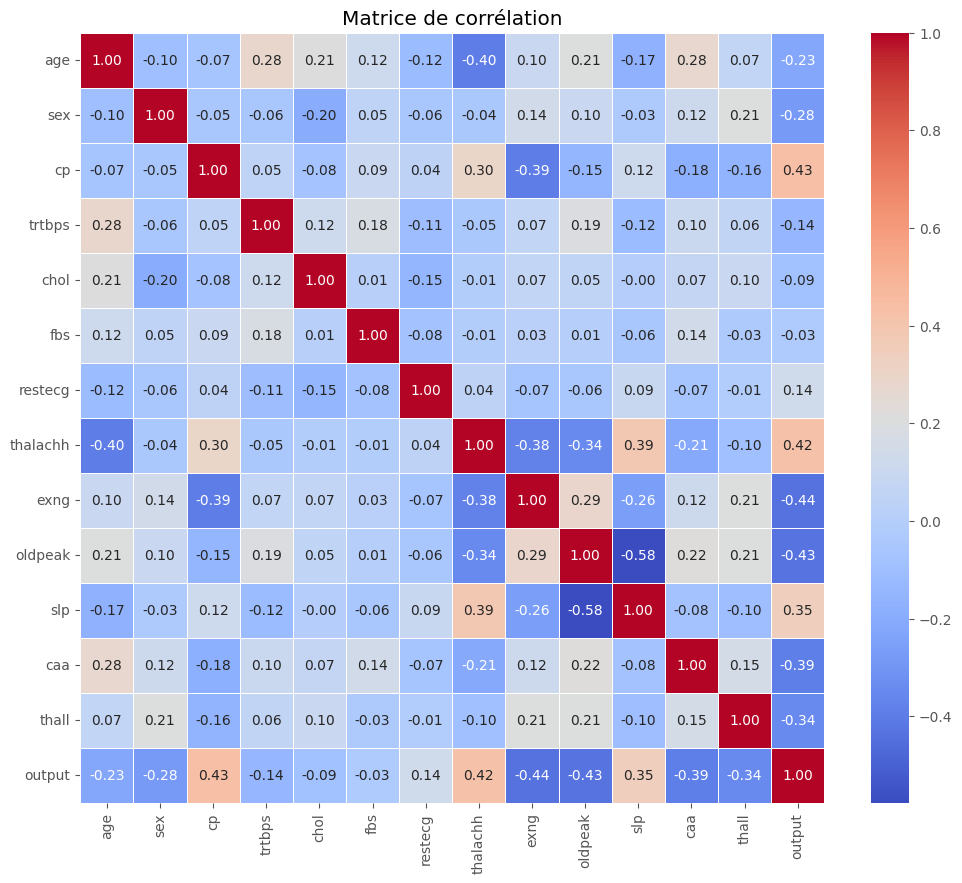

In [7]:
# Créer une instance de la classe Visualization avec votre DataFrame
visualization_instance = Visualization(df)

# Utiliser la méthode plot_correlation
visualization_instance.plot_correlation()


Apprécitiation de la valeur absolue du coefficient de corrélation r : 
0.0 à 0.2 : Très faible
0.2 à 0.4 : Faible
0.4 à 0.6 : Modérée
0.6 à 0.8 : Forte
0.8 à 1.0 : Très forte

En suivant cette mesure d'appréciation des corrélation par paires de variables, on peut dire que : 
* la variable **thalachh** est négativement modérémment corrélés avec la variable **age** (-0.40);
* **oldpeak** est  négativement modérémment corrélés avec la variable **slp** (-0.58).

Par ailleurs on note que toutes les variables sont au moins faiblement corrélées (|r|>0.20) à la variable cible **output** sauf les variables : trtbps (-0.14), chol(-0.09), fbs (-0.03) et restecg (0.14) qui lui sont très faiblement corrélées. On devrait porter une attention particulière sur ces dernières.


### Distribution de quelques variables par rapport à la cible
On observe les distibutions de certaines variables par rapport à la cible "output"

D'abord regardons la proportion de données pour chacune des 2 classes 0 et 1.

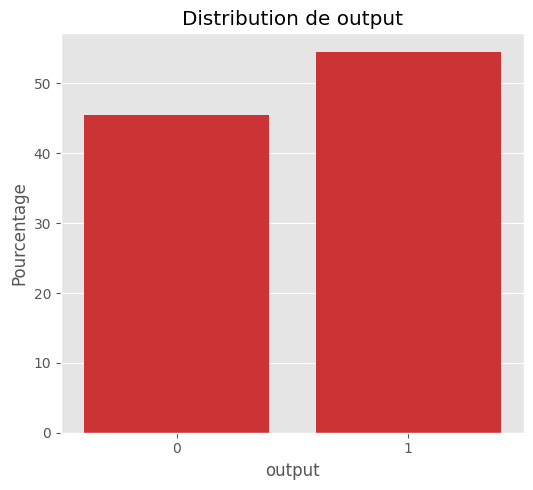

In [8]:
# Distribution de la varaible cible
visualization_instance.plot_distributions(is_numeric=False, variables=[13])

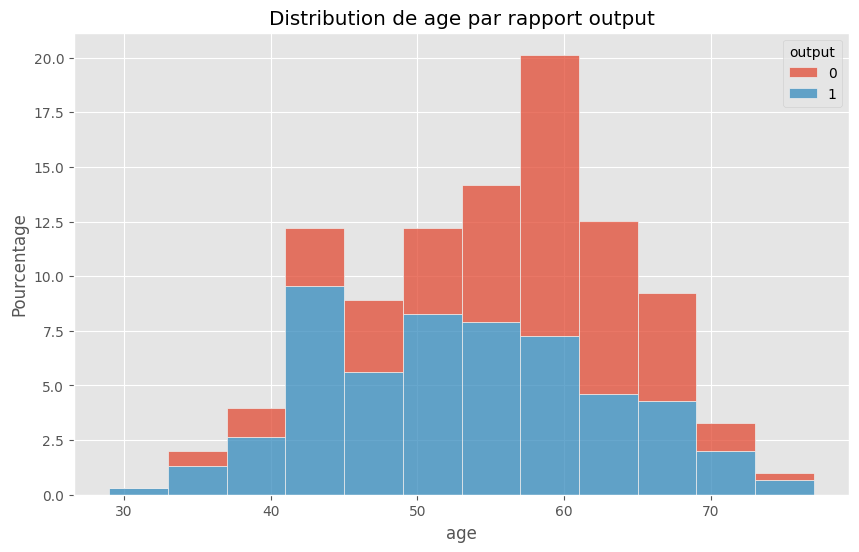

In [9]:
# Répartition de l'age par rapport au risque de maladie cardiaque (output)
visualization_instance.plot_distribution_hue(variable="age", hue="output", is_numeric=True)

Le risque de maladie cardiaque semble augmenter avec l'age.

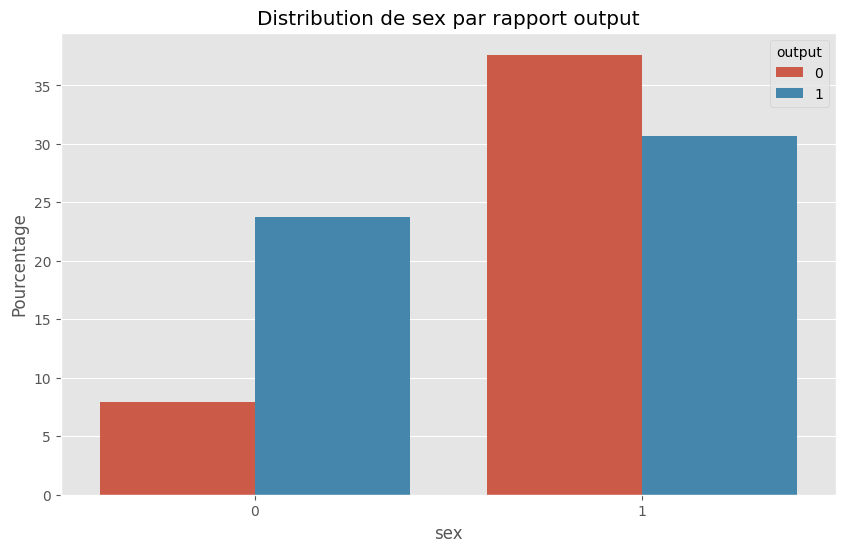

In [10]:
# Répartition du genre (homme : 1 et femme : 0) par rapport au risque de maladie cardiaque (output)
visualization_instance.plot_distribution_hue(variable="sex", hue="output", is_numeric=False)

La répartition du risque de maladie cardiaque suivant le sexe est déséquilibré chez les femmes : il y a plus de femmes avec un risque de maladie cardiaque que de femmes sans risque. 

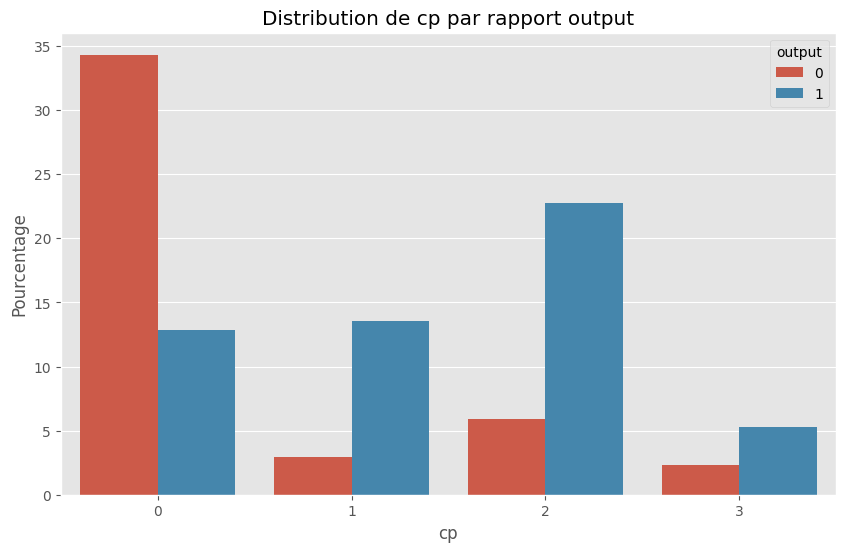

In [11]:
# Distibution du type de douleur par rapport au risque de maladie cardiaque (output)
visualization_instance.plot_distribution_hue(variable="cp", hue="output", is_numeric=False)

Les individus qui ont des douleurs thoraciques de type 1 (angine typique) semblent être peut affecté par le risque de maladie cardiaque contrairement aux autres type de douleurs thoraciques (angine atypique, douleur non angineuse, asymptomatique).

### Distribution de toutes les variables 

#### Distribution des variables numériques

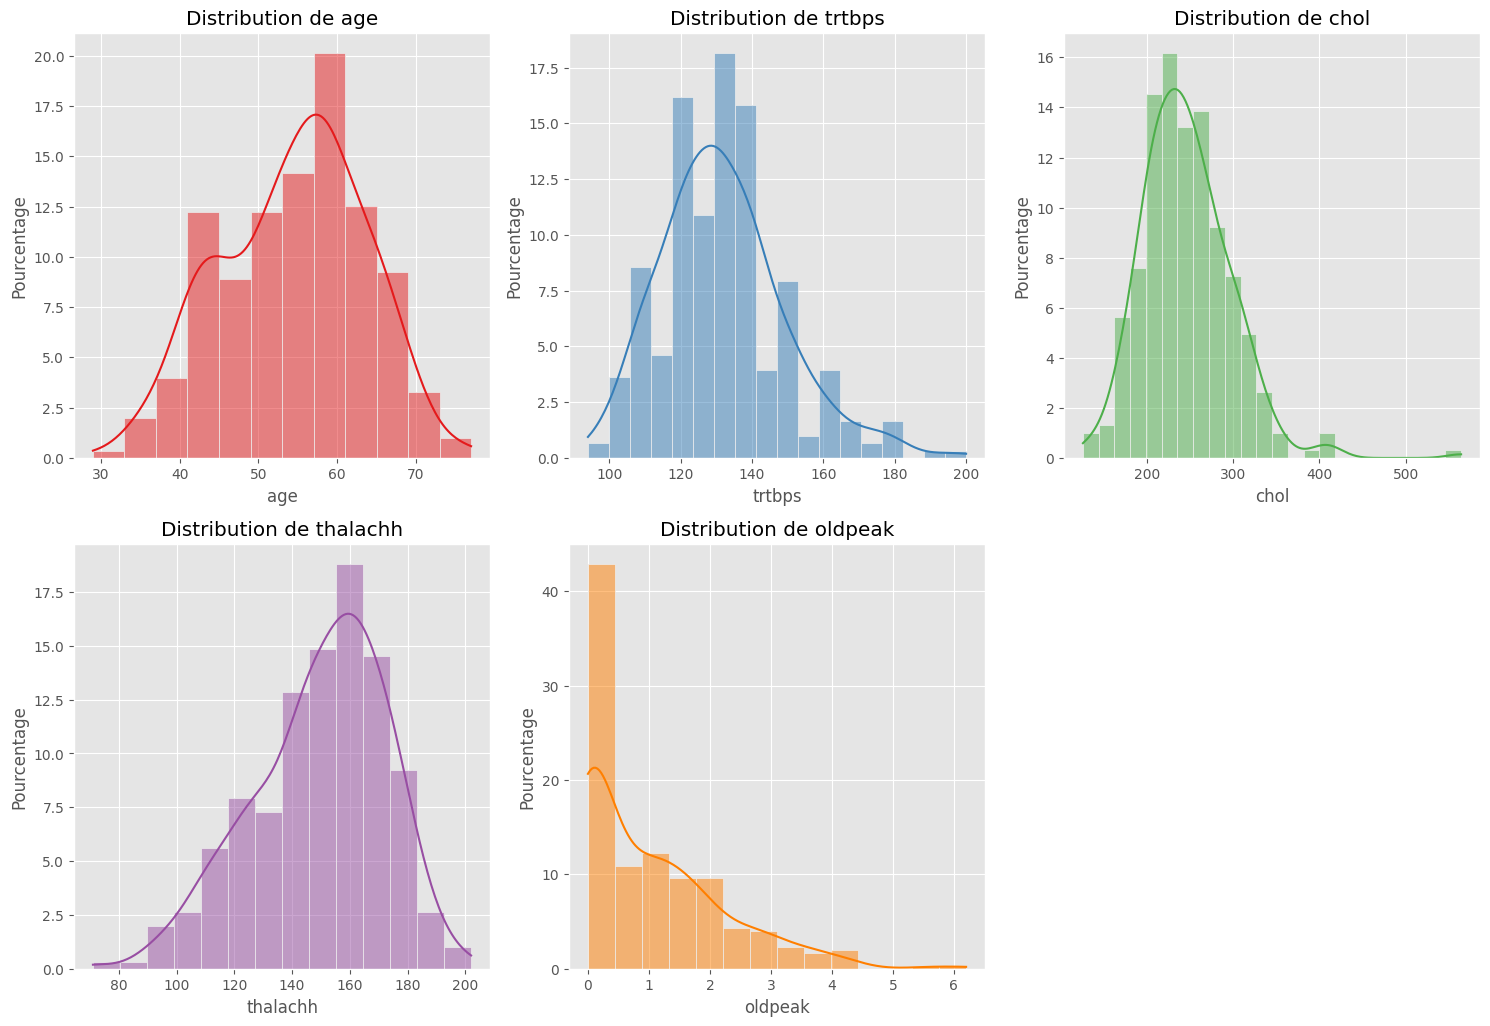

In [12]:
# Distribution des variables numériques
visualization_instance.plot_distributions(is_numeric=True, variables=[0, 3, 4, 7, 9])

#### Distribution des variables catégorielles

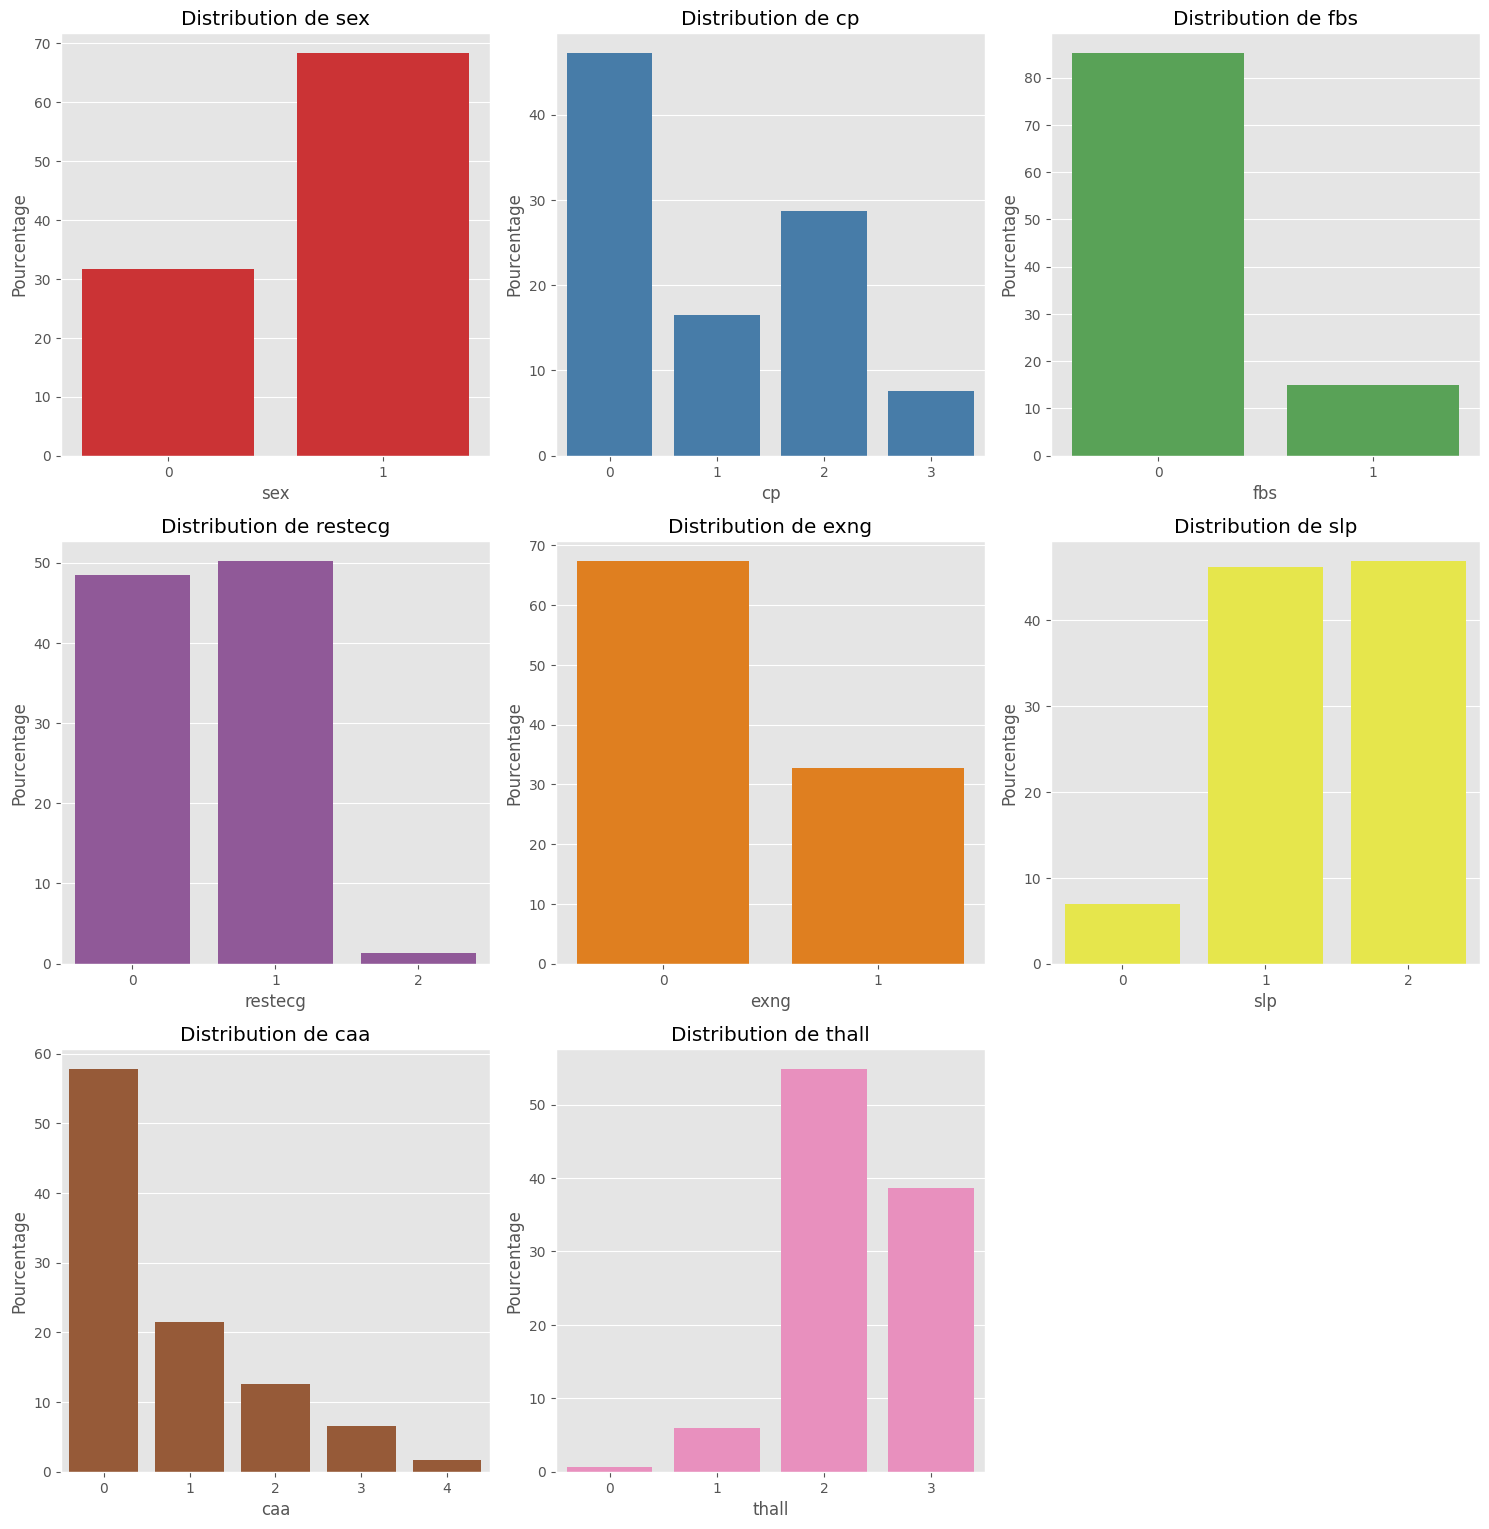

In [13]:
# Distribution des variables catégorielles
visualization_instance.plot_distributions(is_numeric=False, variables=[1, 2, 5, 6, 8, 10, 11, 12])

### Boite à moustache (Boxplot)
Aide à voir les valeurs statistiques comme la moyenne, les quartiles, et surtout les valeurs abérrantes pour les variables numériques

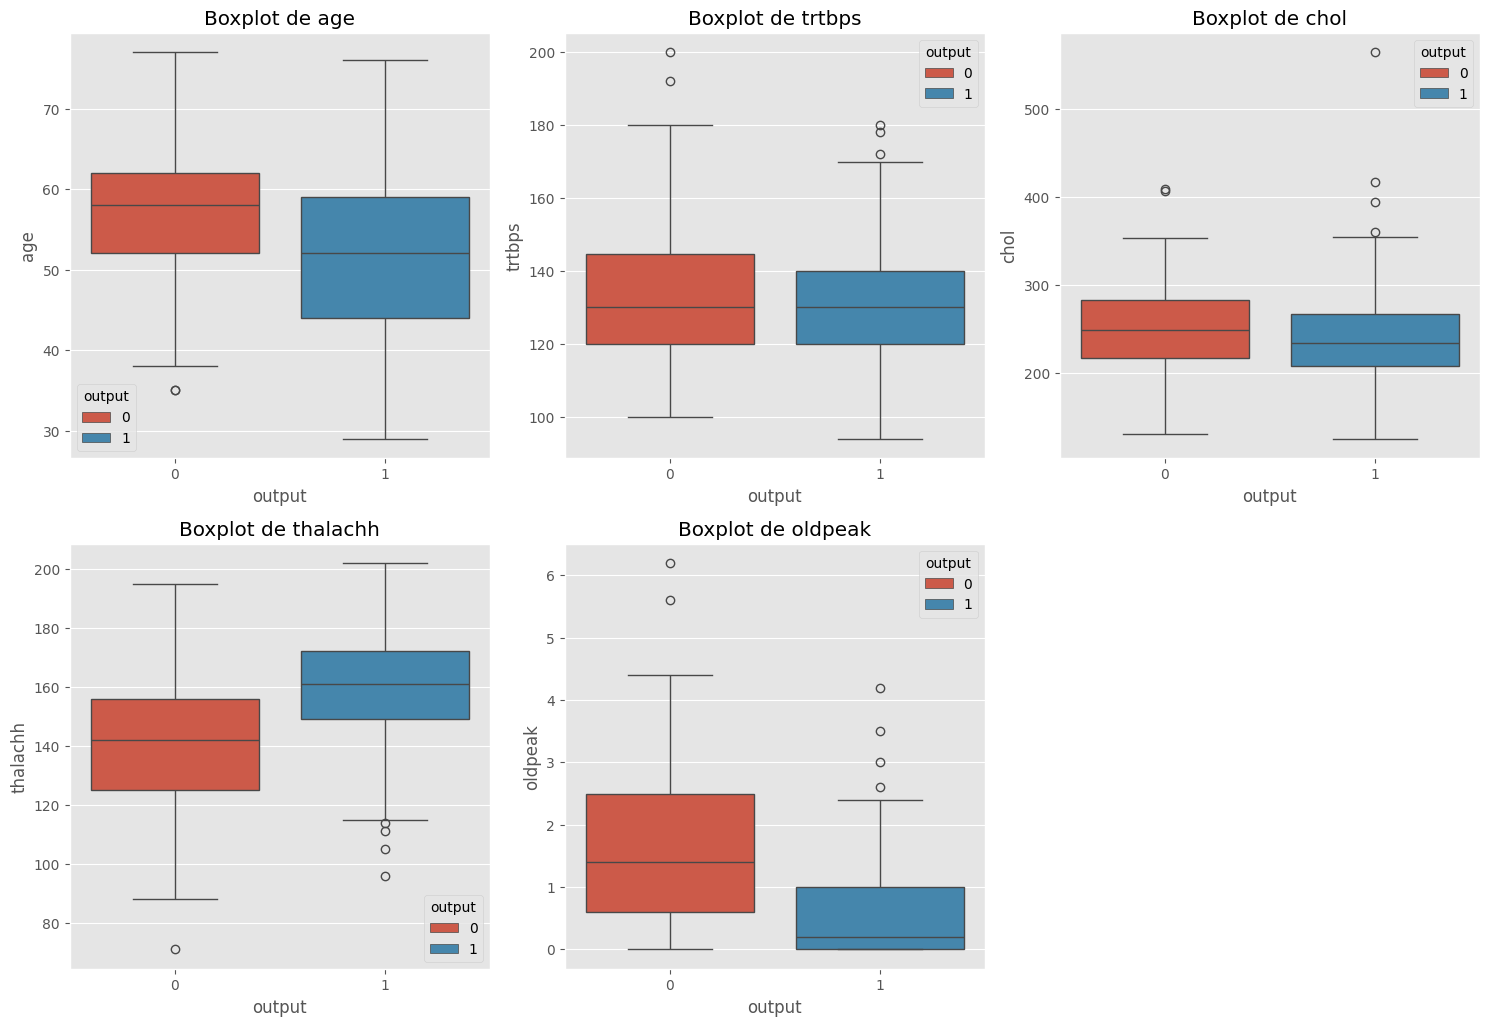

In [14]:
visualization_instance.plot_boxplot(variables=[0, 3, 4, 7, 9], y="output")

# Entrainement et évaluation des 6 algorithmes de classification

* Algorithmes choisis : 
    - Random Forest Classifier,
    - AdaBoost Classifier, 
    - Logistic Regression, 
    - MLP Classifier
    - SVM
    - Linear Discriminant Analysis
* Préârer les données : Mise à l'échelle + Séparation des données en ensembles de d'entrainement et de test. 
* Implémenter la recherche d'hyperparamètres (GridSearchCV)
* Visualiser les courbes de l'accuracy et de la loss

In [15]:
# Instancier la classe DataProcessor
data_processor_instance = DataProcessor(df)

# Liste pour stocker les accuracies de chaque modèle
accuracies = []

*Sanity check : Tester la validité des données* 

In [16]:
from sanity_check import *

# Mise à l'echelle + séparation en ensembles d'entrainement et de test 
X_train, X_test, y_train, y_test = data_processor_instance.prepare_data(data = df, scaler = 'minmax')

accu_svm = test_svm_classifier(X_train, y_train, X_test, y_test)
print('Test accuracy (SVM): {:.3f}'.format(accu_svm))

if accu_svm < 0.7:
    print("ERREUR: L\'accuracy est trop faible. Il se peut qu'il y ait un problème avec les données")
else:
    print('SUCCÈS')

Test accuracy (SVM): 0.791
SUCCÈS


### SVM 

#### Préparation des données

In [17]:
# Mise à l'echelle + séparation en ensembles d'entrainement et de test 
X_train, X_test, y_train, y_test = data_processor_instance.prepare_data(data = df, scaler = 'minmax')

In [18]:
# Liste pour stocker la justesse (accuracy) de chaque modèle
accuracies = []

#### Entrainement du modèle SVM

*Sanity check : vérifier qu'on peut overfitter sur un petit jeu de données*

In [19]:
# Sanity check
overfitting_sanity_check('svm', X_train, y_train, n_check=5)

Accuracy d'entraînement, devrait être 1.0: 0.800
ATTENTION: L'accuracy d'entraînement n'est pas 100%.


In [20]:
# Définition de la grille d'hyperparamètres à tester
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']}

# Initialisation d'une instance de ModelTrainer pour ce modèle
svm_trainer = ModelTrainer(X_train, y_train, model_type='svm', params=svm_params)

# Recherche d'hyperparamètres à l'aide de la validation croisée (Grid Search)
svm_trainer.grid_search(svm_params)

# Entraînement du modèle avec les meilleurs hyperparamètres trouvés
svm_model = svm_trainer.train_model()

Grid Search Hyperparameters : 


Meilleurs Hyperparametres trouvés: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Score 'accuracy' : 86.35658914728683 %


#### Évaluation du modèle SVM

Test Accuracy: 78.02197802197803 %
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.66      0.73        41
           1       0.76      0.88      0.81        50

    accuracy                           0.78        91
   macro avg       0.79      0.77      0.77        91
weighted avg       0.79      0.78      0.78        91


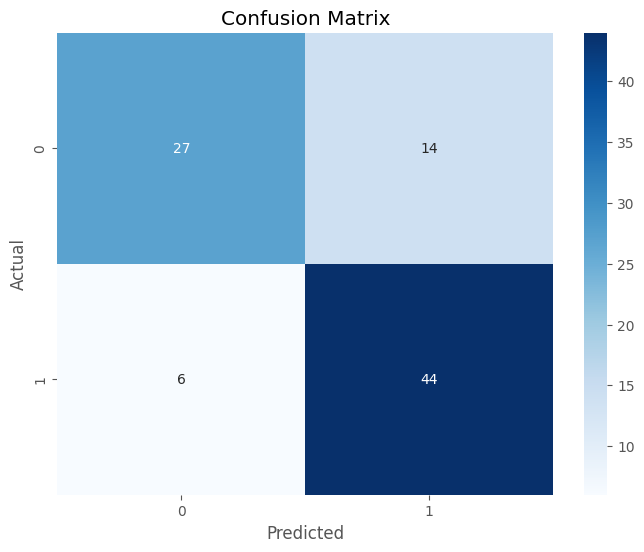

In [21]:

# Évaluation du modèle
svm_trainer.evaluate_model(X_test, y_test)

# Enregister l'accucacy de ce modèle
accuracies.append(('SVM', svm_trainer.model_accuracy))


### Random Forest 

#### Préparation des données

In [22]:
# Mise à l'echelle + séparation en ensembles d'entrainement et de test 
X_train, X_test, y_train, y_test = data_processor_instance.prepare_data(data = df, scaler = 'robust')

#### Entrainement du modèle Random Forest

*Sanity check : vérifier qu'on peut overfitter sur un petit jeu de données*

In [23]:
# Sanity check
overfitting_sanity_check('rf', X_train, y_train, n_check=5)

Accuracy d'entraînement, devrait être 1.0: 1.000
SUCCÈS


In [24]:
# Définition de la grille d'hyperparamètres à tester
rf_params = {'n_estimators': [10, 20, 50, 100, 200], 'criterion':['gini', 'entropy', 'log_loss'], 
                                                            'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 7]}

# Initialisation d'une instance de ModelTrainer pour ce modèle
rf_trainer = ModelTrainer(X_train, y_train, model_type='random_forest', params=rf_params)

# Recherche d'hyperparamètres à l'aide de la validation croisée (Grid Search)
rf_trainer.grid_search(rf_params)

# Entraînement du modèle avec les meilleurs hyperparamètres trouvés
rf_model = rf_trainer.train_model()

Grid Search Hyperparameters : 
Meilleurs Hyperparametres trouvés: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Score 'accuracy' : 86.84385382059801 %


#### Évaluation du modèle Random Forest

Test Accuracy: 76.92307692307693 %
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.68      0.73        41
           1       0.76      0.84      0.80        50

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91


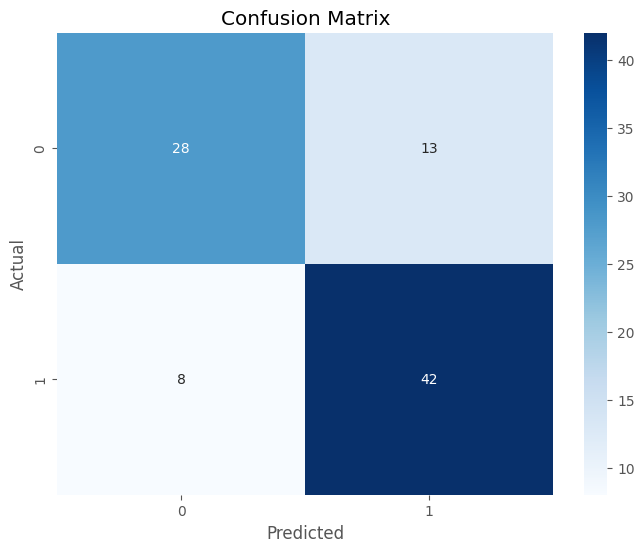

In [25]:
# Évaluation du modèle
rf_trainer.evaluate_model(X_test, y_test)

# Enregister l'accucacy de ce modèle
accuracies.append(('Random Forest', rf_trainer.model_accuracy))

### Logistic Regression

#### Préparation des données

In [26]:
# Mise à l'echelle + séparation en ensembles d'entrainement et de test 
X_train, X_test, y_train, y_test = data_processor_instance.prepare_data(data = df, scaler = 'robust')

#### Entrainement du modèle Logistic Regression

*Sanity check : vérifier qu'on peut overfitter sur un petit jeu de données*

In [27]:
# Sanity check
overfitting_sanity_check('lr', X_train, y_train, n_check=5)

Accuracy d'entraînement, devrait être 1.0: 1.000
SUCCÈS


In [28]:
# Définition de la grille d'hyperparamètres à tester
lr_params = {'C': [0.1, 0.5, 0.8, 1, 2, 3, 4, 5], 'penalty': ['l1', 'l2', 'elasticnet', None]}

# Initialisation d'une instance de ModelTrainer pour ce modèle
lr_trainer = ModelTrainer(X_train, y_train, model_type='logistic_regression', params=lr_params)

# Recherche d'hyperparamètres à l'aide de la validation croisée (Grid Search)
lr_trainer.grid_search(lr_params)

# Entraînement du modèle avec les meilleurs hyperparamètres trouvés
lr_model = lr_trainer.train_model()

Grid Search Hyperparameters : 


Meilleurs Hyperparametres trouvés: {'C': 0.1, 'penalty': 'l2'}
Score 'accuracy' : 86.83277962347731 %


#### Évaluation du modèle Logistic Regression

Test Accuracy: 80.21978021978022 %
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.68      0.76        41
           1       0.78      0.90      0.83        50

    accuracy                           0.80        91
   macro avg       0.81      0.79      0.80        91
weighted avg       0.81      0.80      0.80        91


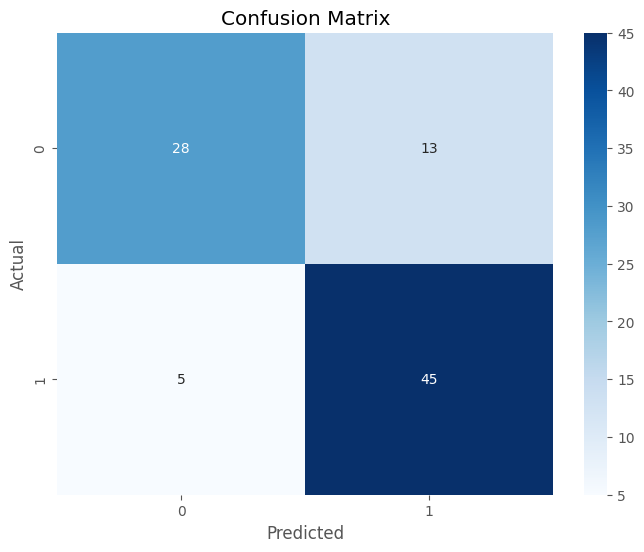

In [29]:
# Évaluation du modèle
lr_trainer.evaluate_model(X_test, y_test)

# Enregister l'accucacy de ce modèle
accuracies.append(('Regression Logistique', lr_trainer.model_accuracy))

### AdaBoost

#### Préparation des données

In [30]:
# Mise à l'echelle + séparation en ensembles d'entrainement et de test 
X_train, X_test, y_train, y_test = data_processor_instance.prepare_data(data = df, scaler = 'minmax')

#### Entrainement du modèle Adaboost

*Sanity check : vérifier qu'on peut overfitter sur un petit jeu de données*

In [31]:
# Sanity check
overfitting_sanity_check('adaboost', X_train, y_train, n_check=5)

Accuracy d'entraînement, devrait être 1.0: 1.000
SUCCÈS


In [32]:
# Définition de la grille d'hyperparamètres à tester
adaboost_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}

# Initialisation d'une instance de ModelTrainer pour ce modèle
adaboost_trainer = ModelTrainer(X_train, y_train, model_type='ada_boost', params=adaboost_params)

# Recherche d'hyperparamètres à l'aide de la validation croisée (Grid Search)
adaboost_trainer.grid_search(adaboost_params)

# Entraînement du modèle avec les meilleurs hyperparamètres trouvés
adaboost_model = adaboost_trainer.train_model()

Grid Search Hyperparameters : 
Meilleurs Hyperparametres trouvés: {'learning_rate': 0.1, 'n_estimators': 100}
Score 'accuracy' : 85.4263565891473 %


#### Évaluation du modèle Adaboost

Test Accuracy: 78.02197802197803 %
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        41
           1       0.79      0.82      0.80        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91


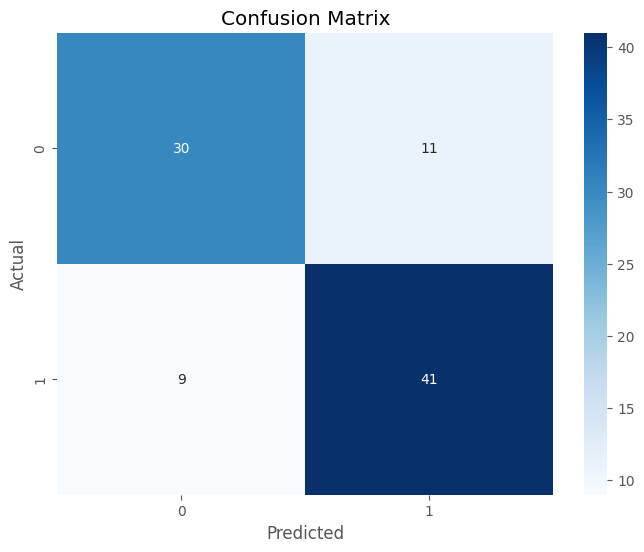

In [33]:
# Évaluation du modèle
adaboost_trainer.evaluate_model(X_test, y_test)

# Enregister l'accucacy de ce modèle
accuracies.append(('Adaboost', adaboost_trainer.model_accuracy))

### MLP (Multi-layer Perceptron)

#### Préparation des données 

In [34]:
# Mise à l'echelle + séparation en ensembles d'entrainement et de test 
X_train, X_test, y_train, y_test = data_processor_instance.prepare_data(data = df, scaler = 'minmax')

#### Entrainement du modèle MLP

*Sanity check 1 : s'assurer qu'une initialisation aléatoire donne une perte (loss) maximale*

In [35]:
# Sanity check 1
mlp_sanity_check(X_train, y_train, num_classes=len(np.unique(y_train)))

Loss après initialisation aléatoire: 0.66061
Loss attendue: 0.69315
SUCCÈS


*Sanity check 2 : vérifier qu'on peut overfitter sur un petit jeu de données*

In [36]:
# Sanity check 2
overfitting_sanity_check('mlp', X_train, y_train, n_check=5)

Accuracy d'entraînement, devrait être 1.0: 1.000
SUCCÈS


Grid Search Hyperparameters : 


Meilleurs Hyperparametres trouvés: {'activation': 'relu', 'alpha': 0.0001, 'early_stopping': False, 'hidden_layer_sizes': (50,), 'max_iter': 300, 'validation_fraction': 0.2}
Score 'accuracy' : 86.82170542635659 %


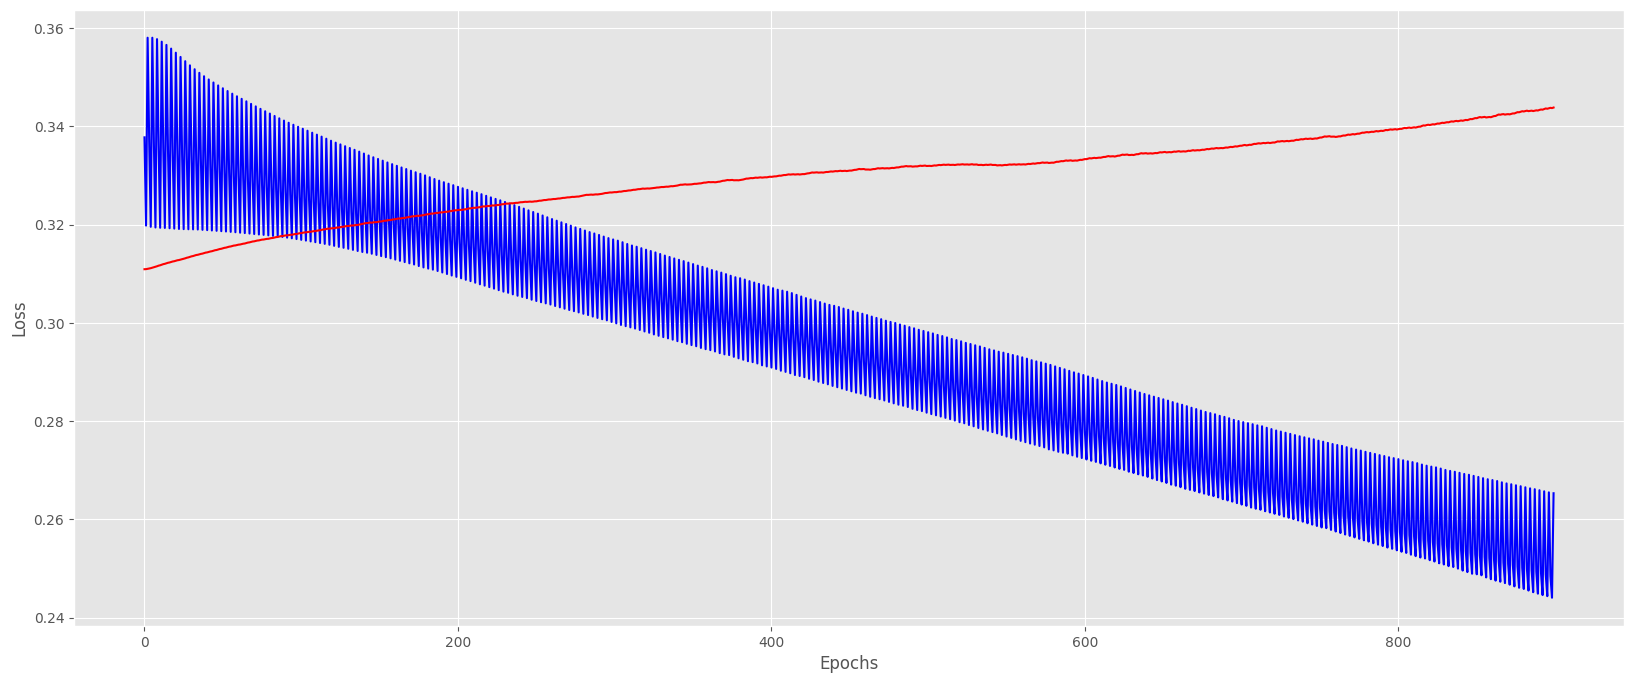

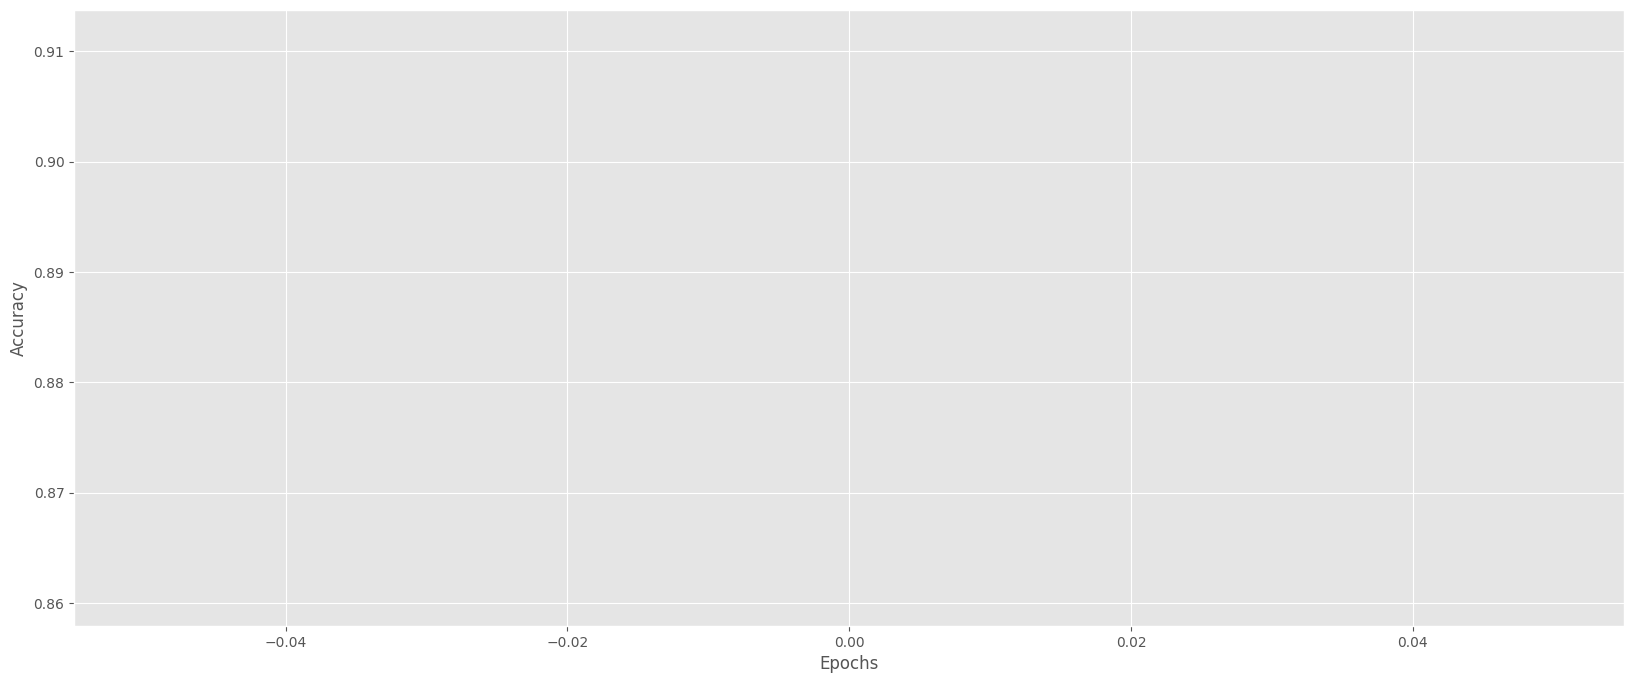

In [37]:
# Définition de la grille d'hyperparamètres à tester
mlp_params = {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)], 'activation': ['relu', 'tanh'], 
              'alpha': [0.0001, 0.001, 0.01], 'max_iter': [100, 200, 300], 'early_stopping': [False], 'validation_fraction': [0.2]}


# Initialisation d'une instance de ModelTrainer pour ce modèle
mlp_trainer = ModelTrainer(X_train, y_train, model_type='mlp', params=mlp_params)

# Recherche d'hyperparamètres à l'aide de la validation croisée (Grid Search)
mlp_trainer.grid_search(mlp_params)

# Entraînement du modèle avec les meilleurs hyperparamètres trouvés
mlp_model = mlp_trainer.train_model()

#### Evaluation du modèle MLP

Test Accuracy: 79.12087912087912 %
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.71      0.75        41
           1       0.78      0.86      0.82        50

    accuracy                           0.79        91
   macro avg       0.79      0.78      0.79        91
weighted avg       0.79      0.79      0.79        91


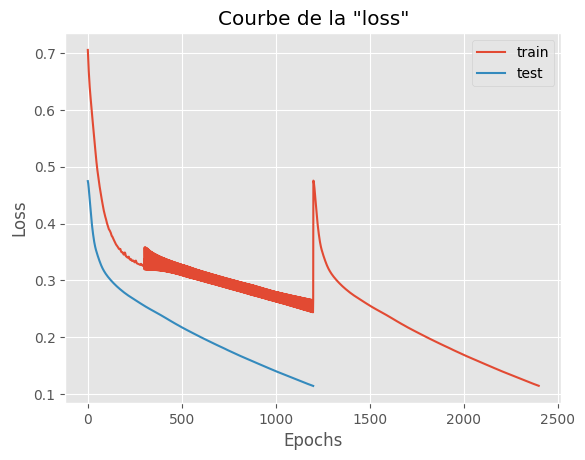

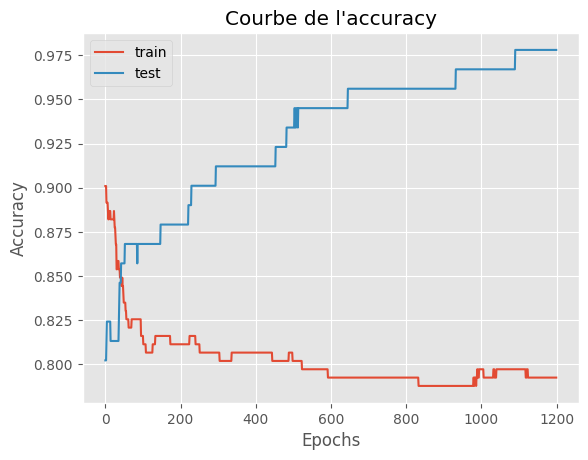

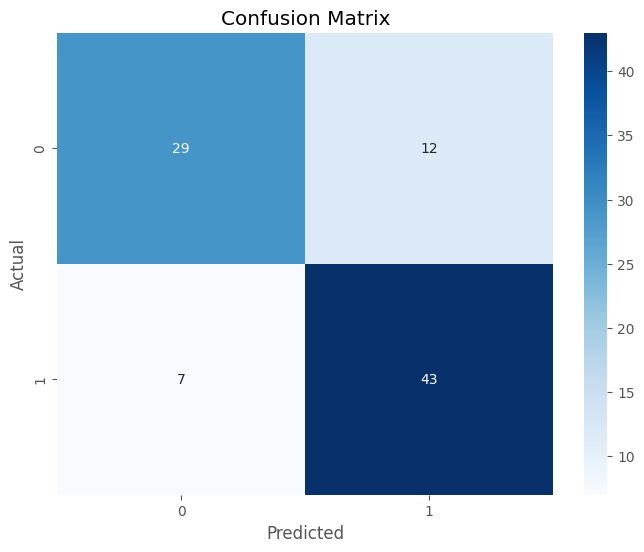

In [38]:
# Évaluation du modèle
mlp_trainer.evaluate_model(X_test, y_test)

# Enregister l'accucacy de ce modèle
accuracies.append(('MLP', mlp_trainer.model_accuracy))  

### Linear Discriminant Analysis (LDA) 

#### Préparation des données

In [39]:
# Mise à l'echelle + séparation en ensembles d'entrainement et de test 
X_train, X_test, y_train, y_test = data_processor_instance.prepare_data(data = df, scaler = None)

#### Entrainement du modèle LDA

*Sanity check : vérifier qu'on peut overfitter sur un petit jeu de données*

In [40]:
# Sanity check
overfitting_sanity_check('lda', X_train, y_train, n_check=5)

Accuracy d'entraînement, devrait être 1.0: 0.800
ATTENTION: L'accuracy d'entraînement n'est pas 100%.


In [41]:
# Initialisation d'une instance de ModelTrainer pour ce modèle
lda_trainer = ModelTrainer(X_train, y_train, model_type='lda')

# Entraînement du modèle (n'a pas d'hyperparamètres)
lda_model = lda_trainer.grid_search(None)


Score 'accuracy' : 87.26415094339622 %


#### Evaluation des paramètres du modèle LDA

Test Accuracy: 75.82417582417582 %
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.66      0.71        41
           1       0.75      0.84      0.79        50

    accuracy                           0.76        91
   macro avg       0.76      0.75      0.75        91
weighted avg       0.76      0.76      0.76        91


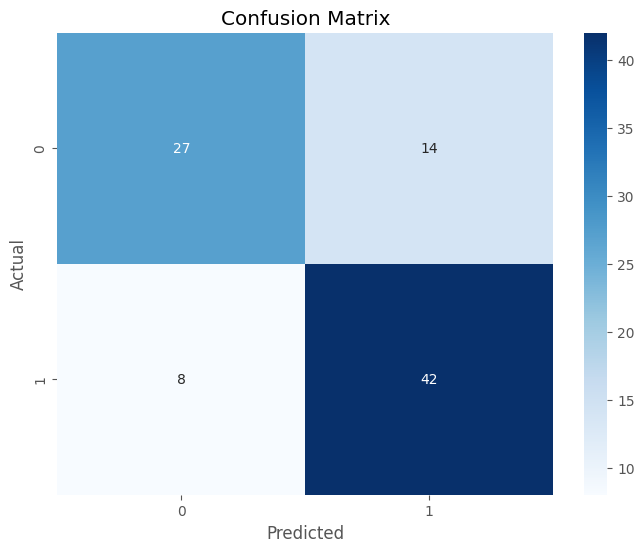

In [42]:
# Évaluation du modèle
lda_trainer.evaluate_model(X_test, y_test)

# Enregister l'accucacy de ce modèle
accuracies.append(('LDA', lda_trainer.model_accuracy))

# Comparaisons des classifieurs et choix du meilleur modèle
* Comparer les 6 modèles implémentés
* Choisir le meilleur modèle
* Voir les variables plus importantes des données pour le modèle choisis

### Comparaison des modèles avec l'accuracy

Accuracy pour chaque modèle:
SVM: 78.02197802197803 %
Random Forest: 76.92307692307693 %
Regression Logistique: 80.21978021978022 %
Adaboost: 78.02197802197803 %
MLP: 79.12087912087912 %
LDA: 75.82417582417582 %


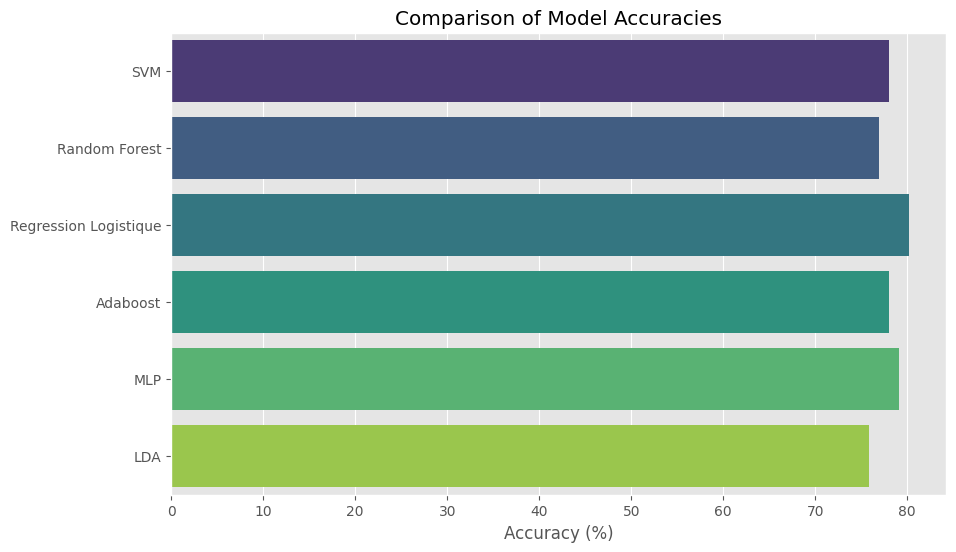

In [43]:
# Affiche les accuracies pour chaque modèle
print("Accuracy pour chaque modèle:")
for model, acc in accuracies:
    print(f"{model}: {acc} %")

# Tracer les accuracies pour comparaison
models, accuracy_values = zip(*accuracies)
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_values, y=models, palette='viridis')
plt.xlabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.show()

Le modèle de **Regression logistique** semble le plus efficace sur nos données avec une généralisation de 80.21 % sur les données de test

### Variables plus importantes des données pour le meilleur modèle 

In [44]:
# Données
X = df.drop('output', axis=1)
y = df['output']


# Coefficients
coefficients = lr_model.coef_[0]

# Création un DataFrame pour afficher les coefficients avec les noms de variables correspondants
coefficients_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': coefficients})

# Afficher le DataFrame trié par valeurs de coefficient absolus
coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)
print(coefficients_df)

    Variable  Coefficient  Absolute_Coefficient
2         cp     0.860696              0.860696
12     thall    -0.570263              0.570263
9    oldpeak    -0.570017              0.570017
8       exng    -0.539291              0.539291
7   thalachh     0.488762              0.488762
1        sex    -0.465015              0.465015
11       caa    -0.435889              0.435889
10       slp     0.423030              0.423030
4       chol    -0.214170              0.214170
6    restecg     0.100672              0.100672
0        age    -0.093801              0.093801
3     trtbps    -0.055503              0.055503
5        fbs     0.044824              0.044824


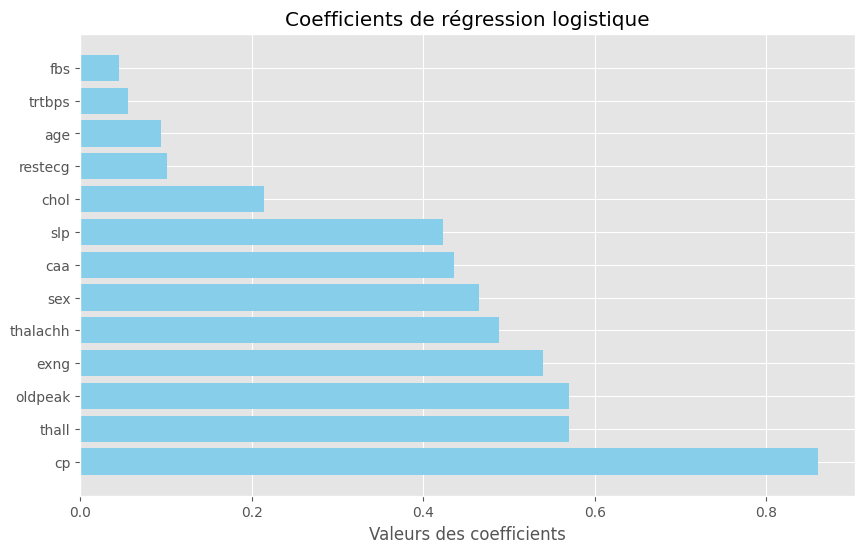

In [45]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Variable'], coefficients_df['Absolute_Coefficient'], color='skyblue')
plt.xlabel('Valeurs des coefficients')
plt.title('Coefficients de régression logistique')
plt.show()